<a href="https://colab.research.google.com/github/RezaulKarim-506/research/blob/master/traditional_model_senti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/my_test_research/dataset_for_Bangla_as_text.csv',encoding = "utf-16", sep = "\t")

In [ ]:
path = '/content/drive/MyDrive/my_test_research/ml_performance'

In [ ]:
stopwords_list = path+'bangla_stopwords.txt'

In [ ]:
data.head()

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral


In [ ]:
data

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral
4999,রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব,happy,negative


In [ ]:
# drop all rows that have NaN/None values
data=data.dropna()
print(data)

                                                Reviews    Feelings  Polarity
0                           জমে উঠেছে গ্রুপ বি এর খেলা।  excitement  positive
1       এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে  excitement   neutral
2                                          সব কয়টা সমান       other   neutral
3                      সোজা হিসাব যে হারবে সেই বাদ পরবে         sad  positive
4                                            হিসাব বরবর       other   neutral
...                                                 ...         ...       ...
4995        এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে         sad  negative
4996  জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...         sad  positive
4997                   যেমন বোলার তেমন ব্যাটসম্যান.....       happy  positive
4998                     টেস্ট ও ওডিআই এর জন্য ঠিক আছে।       other   neutral
4999            রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব       happy  negative

[4997 rows x 3 columns]


In [ ]:
data

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4995,এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে,sad,negative
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral


In [ ]:
data.shape

(4997, 3)

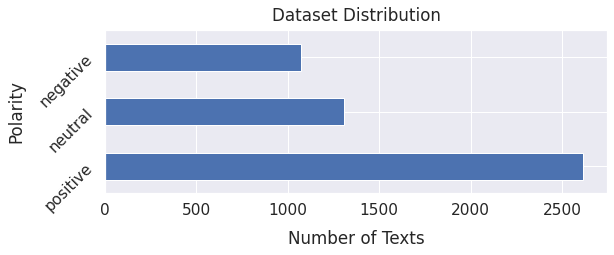

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
data['Polarity'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Texts", labelpad=12)
plt.ylabel("Polarity", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Data Cleaning

In [ ]:
import re,json,nltk
import string
def process_comments(Reviews): 
    Reviews = re.sub('[^\u0980-\u09FF]',' ',str(Reviews)) #removing unnecessary punctuation
    stop_words = open("/content/drive/MyDrive/my_test_research/bangla_stopwords.txt",encoding='utf=8').read().split('\n')
    tokens = re.split('\s+',Reviews)
    Reviews = " ".join(word for word in tokens if word not in stop_words)
    return Reviews

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Reviews'].apply(process_comments)  
print('Original:\n',data.Reviews,'\nCleaned:\n',data.cleaned,'\n')


Original:
 0                             জমে উঠেছে গ্রুপ বি এর খেলা।
1         এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে
2                                            সব কয়টা সমান
3                        সোজা হিসাব যে হারবে সেই বাদ পরবে
4                                              হিসাব বরবর
                              ...                        
4995          এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে
4996    জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...
4997                     যেমন বোলার তেমন ব্যাটসম্যান.....
4998                       টেস্ট ও ওডিআই এর জন্য ঠিক আছে।
4999              রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব
Name: Reviews, Length: 4997, dtype: object 
Cleaned:
 0                                   জমে উঠেছে গ্রুপ খেলা 
1                          খেলা হপ্পে দল হারবে দল বাদ পড়ে
2                                               কয়টা সমান
3                               সোজা হিসাব হারবে বাদ পরবে
4                                              হিসাব বরবর
       

<ipython-input-30-c77f07ec395f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned'] = data['Reviews'].apply(process_comments)


In [ ]:
import numpy as np
def data_summary(data):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(data.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in data.Polarity.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(data[data.Polarity==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(data[data.Polarity==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(data[data.Polarity==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  positive
Number of Documents:2617
Number of Words:18101
Number of Unique Words:5095
Most Frequent Words:

বাংলাদেশ	264
ভালো	249
ক্রিকেট	191
ভাই	184
বাংলাদেশের	113
দল	108
খেলা	105
একটা	101
শুভকামনা	100
ম্যাচ	97

Class Name :  neutral
Number of Documents:1310
Number of Words:8443
Number of Unique Words:4031
Most Frequent Words:

ভালো	66
ভাই	53
একটা	49
কথা	43
দল	42
খেলা	41
শান্ত	40
দিয়ে	40
দলের	39
সাথে	39

Class Name :  negative
Number of Documents:1070
Number of Words:7113
Number of Unique Words:3088
Most Frequent Words:

শান্ত	111
বাংলাদেশ	77
দলে	57
ভালো	53
লর্ড	53
দল	50
নান্নু	50
ক্রিকেট	48
জাতীয়	45
বাদ	36
Total Number of Unique Words:8551


In [ ]:
positive = data[data.Polarity == 'positive']
negative = data[data.Polarity == 'negative'][:4000]
data = positive.append(negative,ignore_index=True)
data.Polarity.value_counts()

positive    2617
negative    1070
Name: Polarity, dtype: int64

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(Polarity,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(Polarity)
    encoded_labels = le.transform(Polarity)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(Polarity[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,Polarity):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,Polarity,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
data.cleaned = data.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(Reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(Reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
## save the performance of the model for each gram feature 
import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    average='micro'
    tfidf,feature = calc_gram_tfidf(data.cleaned,gram)
    labels = label_encoding(data.Polarity,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 6695

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3687 
	Training		 3318 
	Test			 369
Feature Size :======> 23037

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3687 
	Training		 3318 
	Test			 369
Feature Size :======> 38075

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 3687 
	Training		 3318 
	Test			 369


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     77.78      76.81   98.08     86.15          LR
1     76.69      84.25   82.31     83.27          DT
2     81.84      82.49   94.23     87.97          RF
3     78.86      82.73   88.46     85.50         MNB
4     74.25      79.57   85.38     82.37         KNN
5     73.17      72.68   99.23     83.90  Linear SVM
6     76.42      75.52   98.46     85.48     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by RF at = 81.84
Highest F1-Score achieved by RF at = 87.97
Highest Precision Score achieved by DT at = 84.25
Highest Recall Score achieved by Linear SVM at = 99.22999999999999

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     74.53      73.71   99.23     84.59          LR
1     74.53      83.47   79.62     81.50          DT
2     81.03      80.84   95.77     87.68          R

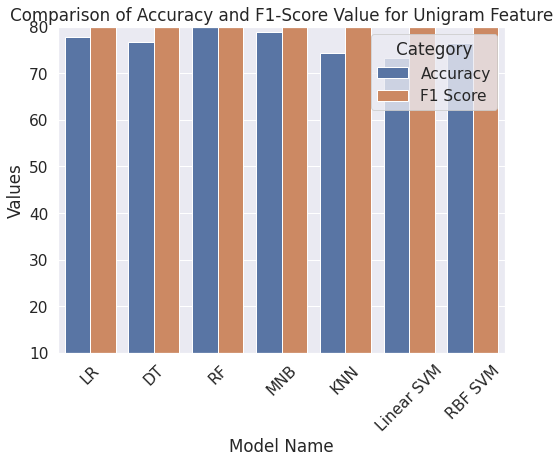

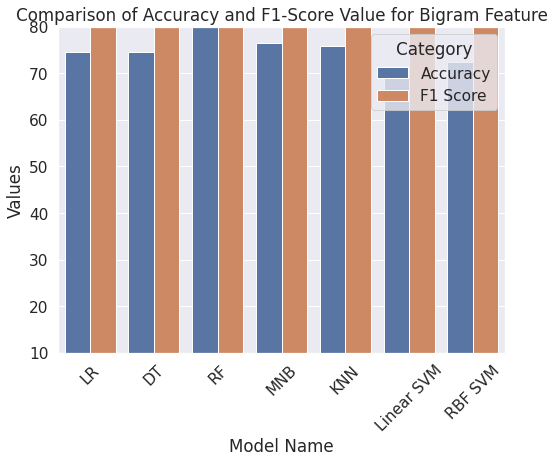

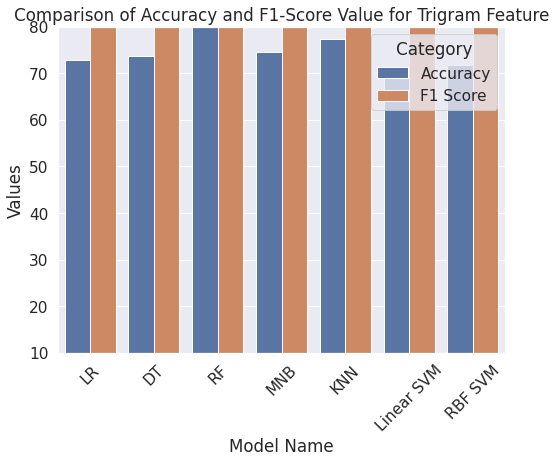

In [ ]:
import matplotlib.pyplot as plt
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);